# **Machine Learning Final Project**  
## **HELOC Insight: A Data Study** 

### Student Name: Miguel Angel Huamani

# Part 1: Exploratory Data Analysis

### Importo todo lo que voy a usar durante el proyecto

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de modelado y evaluación
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_curve, auc)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Módulo con funciones personalizadas
from utils import *
from scipy.stats import mode

In [3]:
df = pd.read_csv('FICO_Dataset.csv', sep=";")
df.head(10) #Lo primero que haremos es visualizar la pinta de los datos para hacernos una idea de como estan deistribuidas las variables de entrada y de salida.  
# Como se puede observar la variable RiskPerformance (OUTPUT), está en la primera columna (IMPORTANTE TENERLO EN CUENTA)

RiskPerformance  ExternalRiskEstimate  NetFractionRevolvingBurden  \
0              1.0                    55                          33   
1              1.0                    61                           0   
2              1.0                    67                          53   
3              1.0                    66                          72   
4              1.0                    81                          51   
5              1.0                    59                          62   
6              0.0                    54                          89   
7              0.0                    68                          28   
8              1.0                    59                          68   
9              1.0                    61                          31   

   AverageMInFile  MSinceOldestTradeOpen  PercentTradesWBalance  \
0              84                  144.0                   69.0   
1              41                   58.0                    0.0   
2              24                   66.0                   86.0   
3              73                  169.0                   91.0   
4             132                  333.0                   80.0   
5              78                  137.0                   94.0   
6              37                   88.0                  100.0   
7              65                  148.0                   40.0   
8             138                  324.0                   90.0   
9              36                   79.0                   62.0   

   PercentInstallTrades  NumSatisfactoryTrades  NumTotalTrades  \
0                    43                   20.0            23.0   
1                    67                    2.0             7.0   
2                    44                    9.0             9.0   
3                    57                   28.0            30.0   
4                    25                   12.0            12.0   
5                    47                   31.0            32.0   
6                    58                   25.0            26.0   
7                    44                   17.0            18.0   
8                    26                   24.0            27.0   
9                    26                   19.0            19.0   

   PercentTradesNeverDelq  MSinceMostRecentInqexcl7days  
0                      83                             0  
1                     100                             0  
2                     100                             0  
3                      93                             0  
4                     100                             0  
5                      91                             0  
6                      92                             0  
7                      83                             0  
8                      85                             0  
9                      95                             0

## 1.1. Exploratory Data Analysis (EDA)

In [4]:
print(df.info())   #De aquí obtenemos que todos los datos son númericos, por lo que este modelo no contará con ninguna variable categórica mas que la de salida (por ser una clasificación, aunque equivale a 0 y 1). 
print()
print('Tamaño del dataset inicial: ', df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RiskPerformance               5245 non-null   float64
 1   ExternalRiskEstimate          7442 non-null   int64  
 2   NetFractionRevolvingBurden    7442 non-null   int64  
 3   AverageMInFile                7442 non-null   int64  
 4   MSinceOldestTradeOpen         7415 non-null   float64
 5   PercentTradesWBalance         7386 non-null   float64
 6   PercentInstallTrades          7442 non-null   int64  
 7   NumSatisfactoryTrades         7425 non-null   float64
 8   NumTotalTrades                7419 non-null   float64
 9   PercentTradesNeverDelq        7442 non-null   int64  
 10  MSinceMostRecentInqexcl7days  7442 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 639.7 KB
None

Tamaño del dataset inicial:  7442


In [5]:
print("Número de valores nulos en cada columna:")
print(df.isnull().sum() )  #Importante tener en cuenta la existencia de valores nulos
print()
for i in [-7, -8, -9]:  #Lista de valores especiales
    conteo_especiales = df.applymap(lambda valor_especial: valor_especial == i).sum()
    print()
    print(f"Número de valores especiales {i} en cada columna:")
    print(conteo_especiales)    #Además, de que en las variables de entrada contamos a su vez con los valores especiales mencionados en el enunciado de este proyecto

Número de valores nulos en cada columna:
RiskPerformance                 2197
ExternalRiskEstimate               0
NetFractionRevolvingBurden         0
AverageMInFile                     0
MSinceOldestTradeOpen             27
PercentTradesWBalance             56
PercentInstallTrades               0
NumSatisfactoryTrades             17
NumTotalTrades                    23
PercentTradesNeverDelq             0
MSinceMostRecentInqexcl7days       0
dtype: int64


Número de valores especiales -7 en cada columna:
RiskPerformance                  0
ExternalRiskEstimate             0
NetFractionRevolvingBurden       0
AverageMInFile                   0
MSinceOldestTradeOpen            0
PercentTradesWBalance            0
PercentInstallTrades             0
NumSatisfactoryTrades            0
NumTotalTrades                   0
PercentTradesNeverDelq           0
MSinceMostRecentInqexcl7days    50
dtype: int64

Número de valores especiales -8 en cada columna:
RiskPerformance                  0
Exter

/var/folders/k4/xq25x9gd4m36fl9txfhsqg3m0000gn/T/ipykernel_3039/3450713026.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  conteo_especiales = df.applymap(lambda valor_especial: valor_especial == i).sum()


### COMENTARIO: Primero eliminaremos aquellos datos que tengan valores nulos en la variable de salida, y pasaremos los valores especiales a valores nulos como se menciona en el PDF.

In [6]:
df = df.dropna(subset=['RiskPerformance'])
df = df.replace([-7,-8,-9], pd.NA)

print("Número de valores nulos en cada columna:")
print(df.isnull().sum())    #Observamos ahora la cantidad de valores nulos por columna del dataset
print()
print('Tamaño del dataset sin valores nulos en el output: ', df.shape[0])   #Se ha reducido considerablemente

Número de valores nulos en cada columna:
RiskPerformance                   0
ExternalRiskEstimate             50
NetFractionRevolvingBurden       61
AverageMInFile                   50
MSinceOldestTradeOpen            78
PercentTradesWBalance           107
PercentInstallTrades             50
NumSatisfactoryTrades            67
NumTotalTrades                   73
PercentTradesNeverDelq           50
MSinceMostRecentInqexcl7days    139
dtype: int64

Tamaño del dataset sin valores nulos en el output:  5245


In [7]:
#Como mencionamos en el PDF,vamos a eliminar también los valores nulos en las variables de entrada reduciendo 
df = df.dropna()
print('Tamaño del dataset sin valores nulos en el dataset: ', df.shape[0])   #Se ha reducido considerablemente
print()
df['RiskPerformance'].value_counts()    #Verificamos el balance de clases, y estas están balanceadas y con datos íntegros y válidos

Tamaño del dataset sin valores nulos en el dataset:  4972



RiskPerformance
1.0    2538
0.0    2434
Name: count, dtype: int64

### COMENTARIO: Observaremos ahora el comportamiento/distribución de cada característica del dataset.

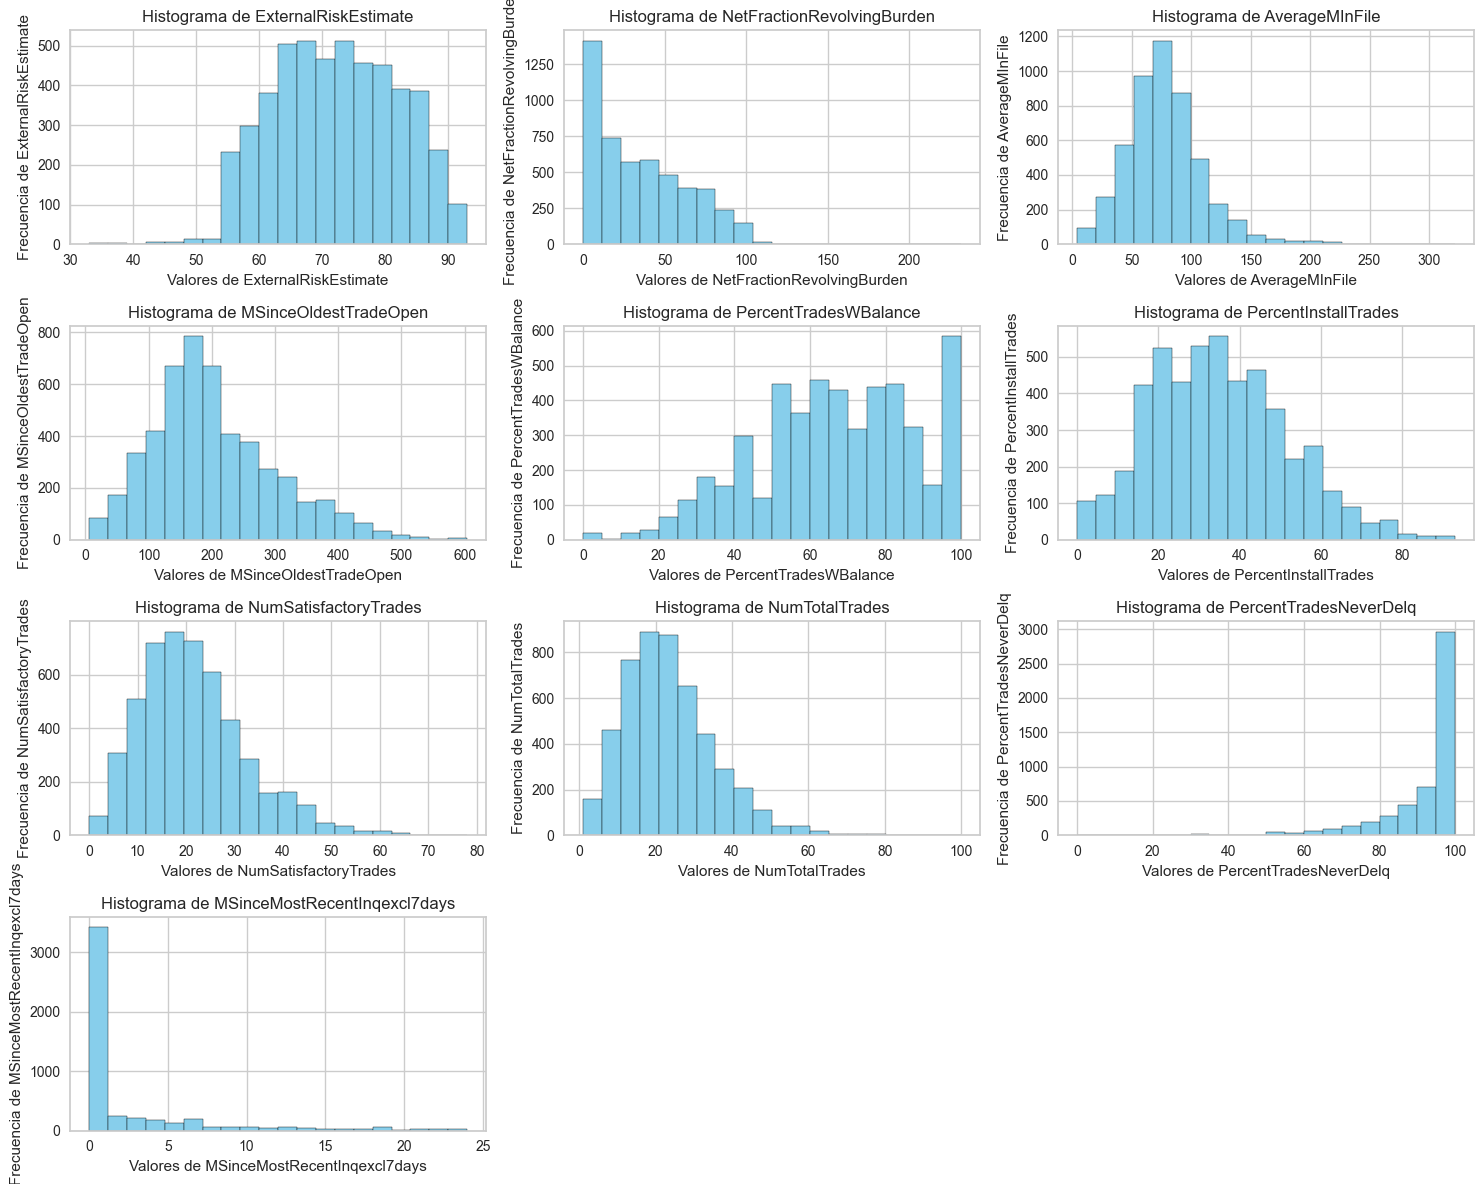

In [8]:
variables = df.columns[1:]
    
# Calcular el número de filas y columnas para los subplots
columnas = len(variables)
num_filas = (columnas - 1) // 3 + 1
num_cols = min(3, columnas)

# Crear la figura y los ejes de los subplots
fig, axes = plt.subplots(num_filas, num_cols, figsize=(15, 3*num_filas))

# Iterar sobre las variables y crear los histogramas
for i, variable in enumerate(variables):
    fila = i // num_cols
    columna = i % num_cols
    ax = axes[fila, columna] if num_filas > 1 else axes[columna]
    ax.hist(df[variable], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma de {variable}')
    ax.set_xlabel(f'Valores de {variable}')
    ax.set_ylabel(f'Frecuencia de {variable}')
    ax.grid(True)

# Ajustar el diseño y ocultar ejes vacíos
for i in range(columnas, num_filas*num_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf 

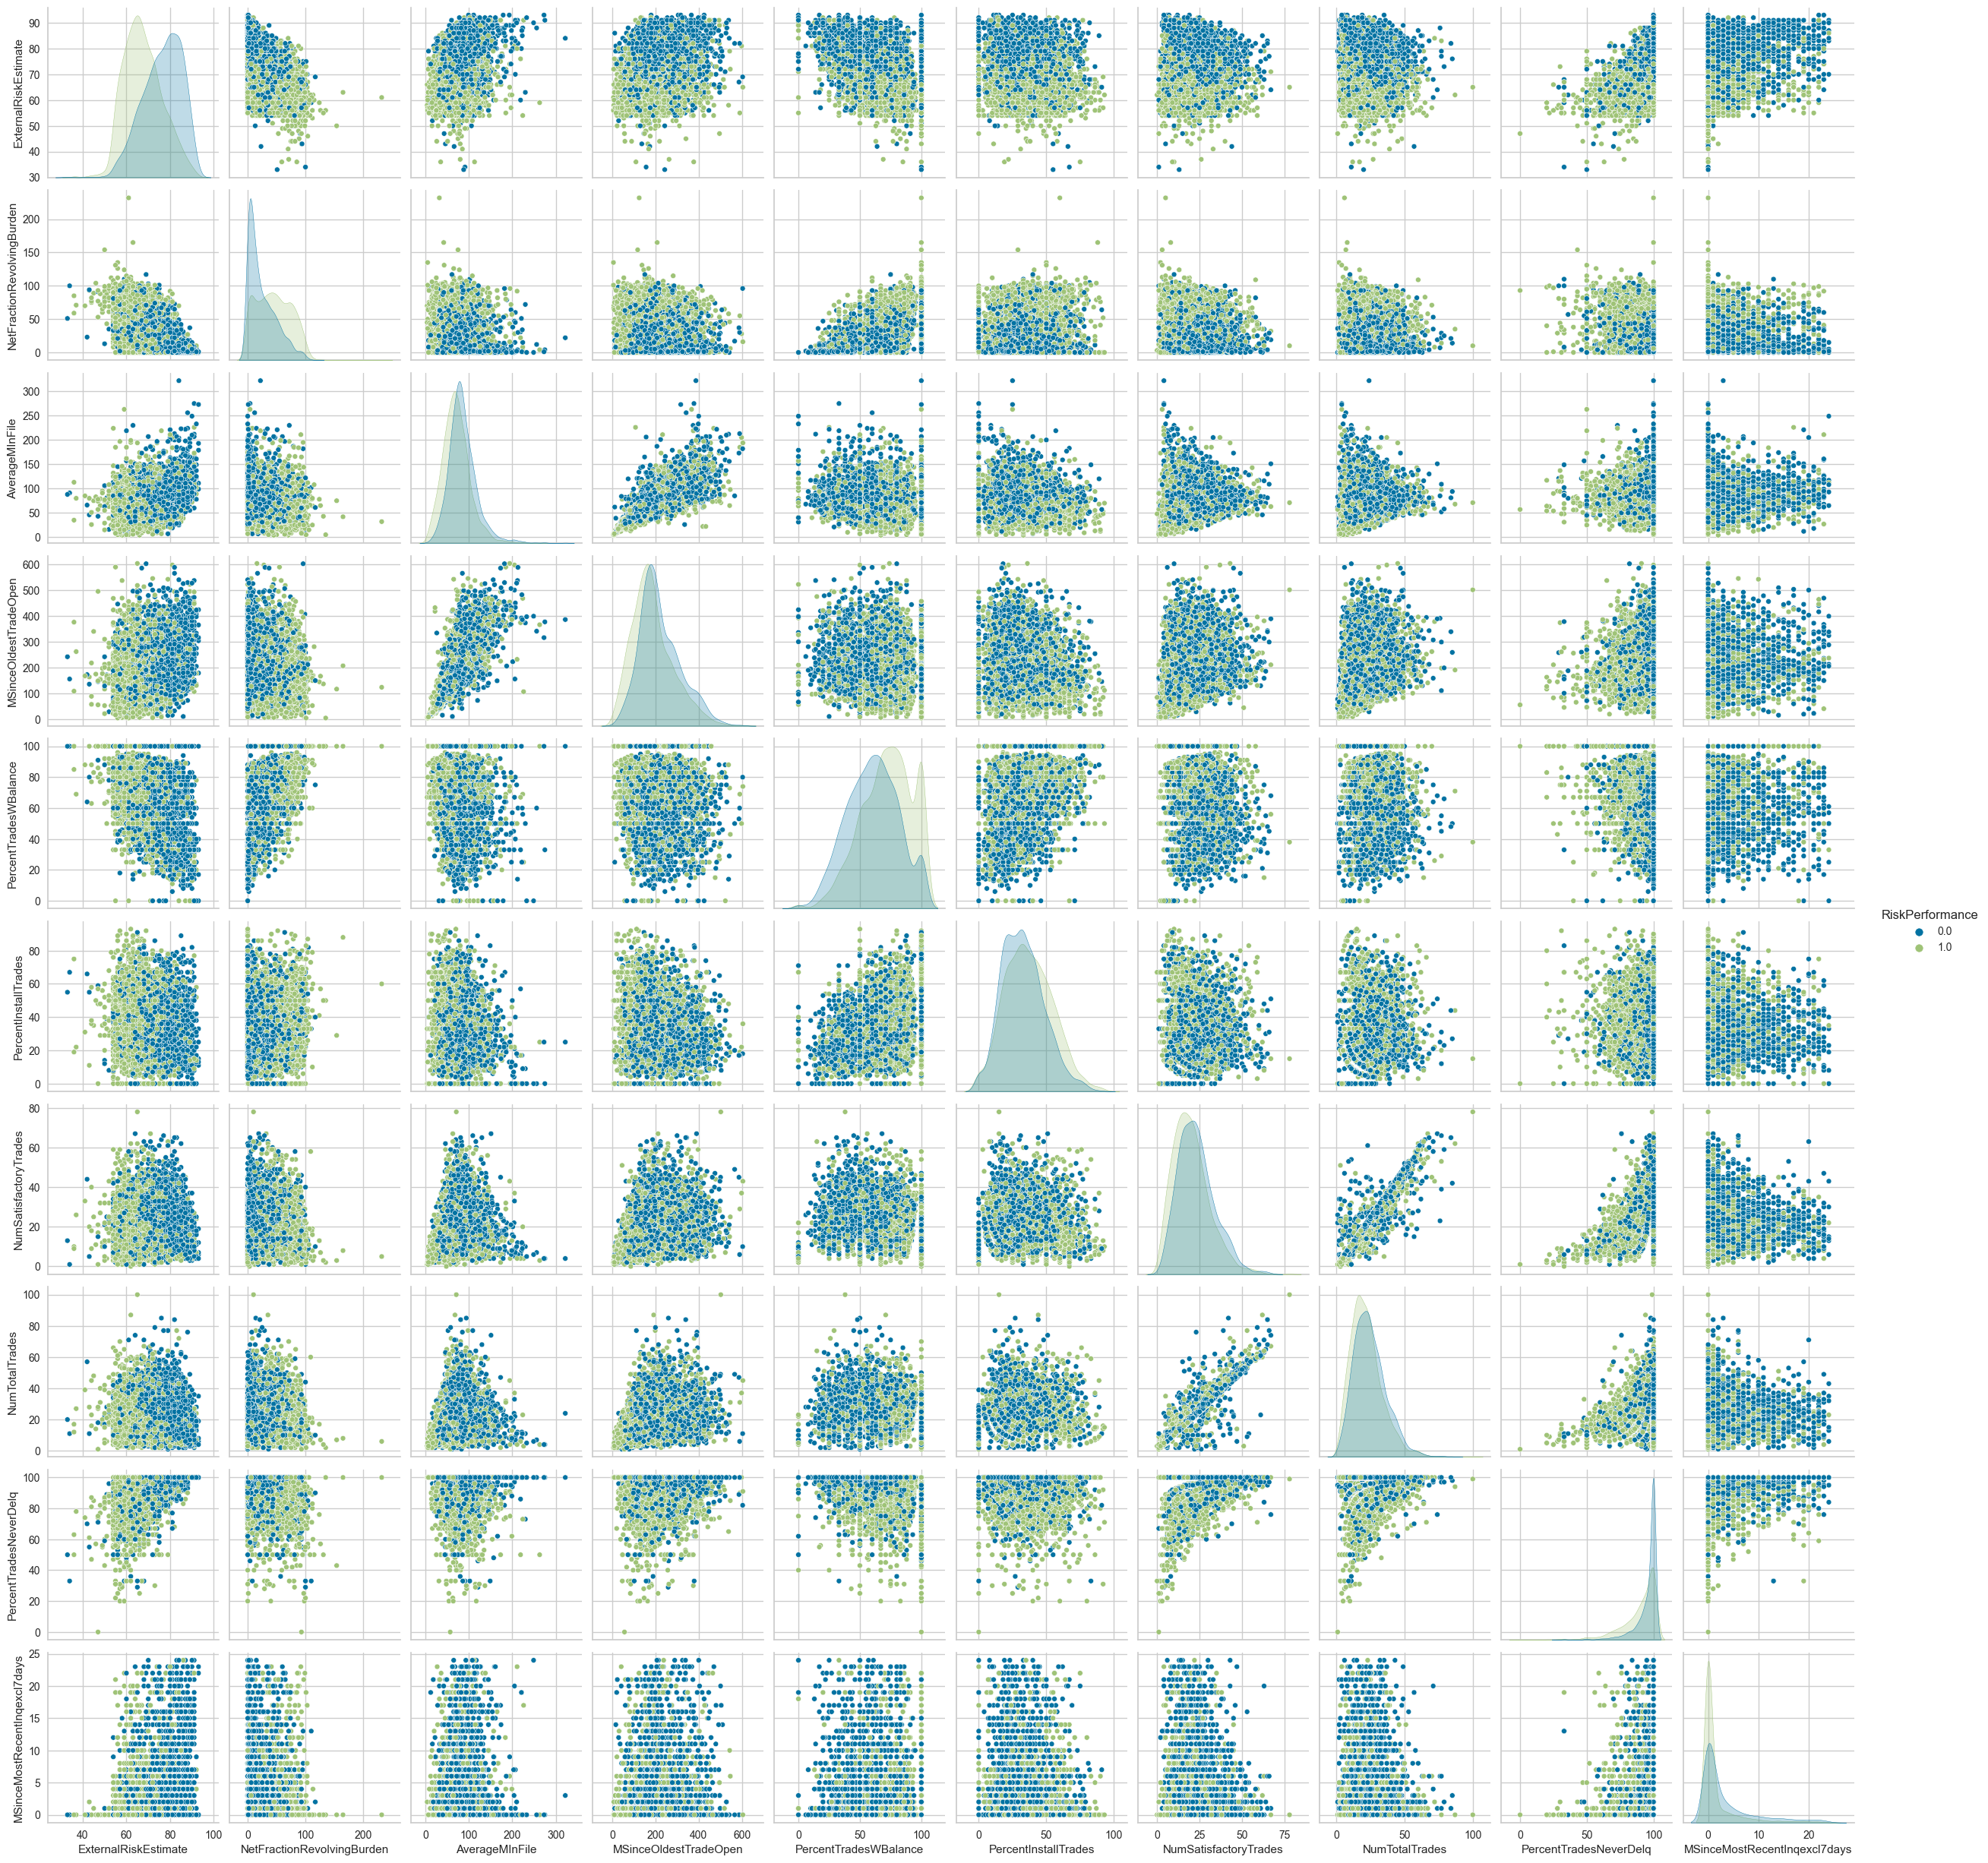

In [9]:
sns.pairplot(df, hue = "RiskPerformance", markers=['o', 'o'], plot_kws={'s':25})
plt.show()

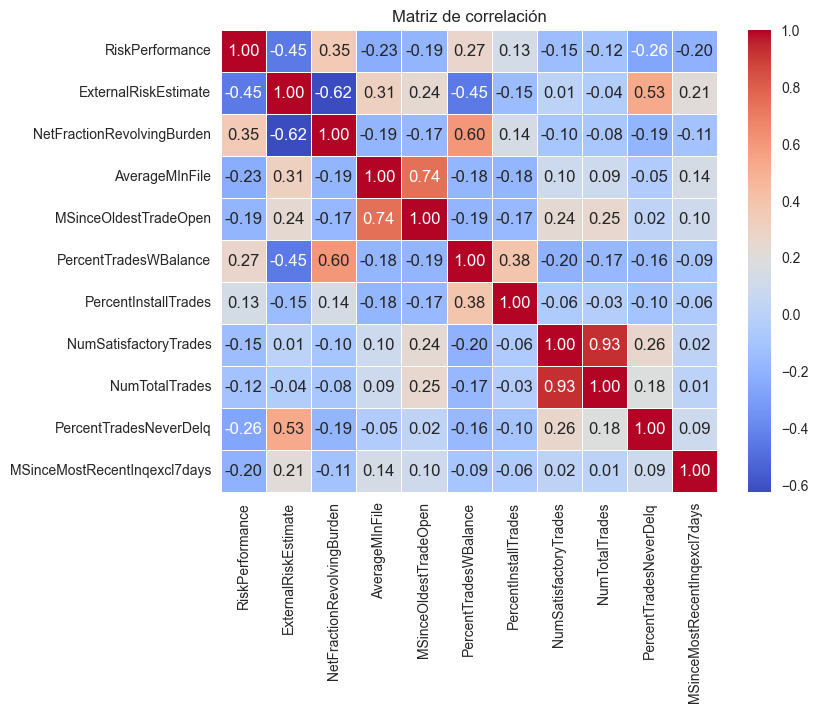

In [10]:
df = df.apply(pd.to_numeric, errors='coerce')

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


## VALORES ATÍPICOS

## Ejemplo para la variable: ExternalRiskEstimate

/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


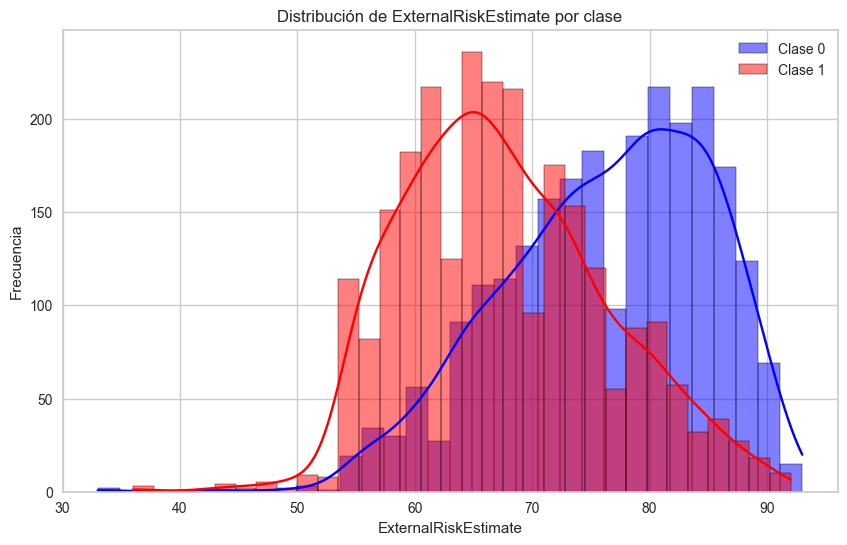

In [11]:
# Filtrar el DataFrame por cada clase
clase_0 = df[df['RiskPerformance'] == 0]['ExternalRiskEstimate']
clase_1 = df[df['RiskPerformance'] == 1]['ExternalRiskEstimate']

# Crear histogramas para cada clase
plt.figure(figsize=(10, 6))
sns.histplot(clase_0, color='blue', label='Clase 0', kde=True)
sns.histplot(clase_1, color='red', label='Clase 1', kde=True)

# Añadir etiquetas y leyenda
plt.xlabel('ExternalRiskEstimate')
plt.ylabel('Frecuencia')
plt.title('Distribución de ExternalRiskEstimate por clase')
plt.legend()

# Mostrar el gráfico
plt.show()

## ELIMINACIÓN DE ATIPICOS

In [12]:
df = df[df['ExternalRiskEstimate'] > 35]
df = df[df['NetFractionRevolvingBurden'] < 200]
df = df[df['MSinceOldestTradeOpen'] < 500]  
df = df[df['NumSatisfactoryTrades'] < 75] 

In [13]:
df.shape

(4944, 11)

In [14]:
#Como mencionamos en el PDF,vamos a eliminar también los valores nulos en las variables de entrada reduciendo 
print('Tamaño del dataset sin valores nulos en el dataset: ', df.shape[0])   #Se ha reducido considerablemente
print()
df['RiskPerformance'].value_counts()    #Verificamos el balance de clases, y estas están balanceadas y con datos íntegros y válidos

Tamaño del dataset sin valores nulos en el dataset:  4944



RiskPerformance
1.0    2527
0.0    2417
Name: count, dtype: int64

## 1.2 Divide data into train and test sets

In [15]:
X = df.drop('RiskPerformance', axis=1)
y = df['RiskPerformance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part 2: Classification

In [16]:
diccionario_modelos = {}    #Incializo esto para ir almcenando cada modelo con los hiperparáemtros óptimos

### Voy a hacer uso de los siguientes modelos de clasificación: Logistic Regression, Naive Bayes, Random Forest, Gradient Boosting y Support Vector Machine.

In [17]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

scaler = StandardScaler()

# Normalizar los datos de entrenamiento y transformar los datos de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir las matrices NumPy escaladas nuevamente en dataframes de pandas
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Logistic Regression

/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1796: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1796: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Precisión en el conjunto de prueba (con regularización l1): 0.7451971688574317
Precisión en el conjunto de prueba (con regularización l2): 0.7451971688574317
El l1_ratio óptimo para ElasticNet es: [0.1]
Precisión en el conjunto de prueba (con regularización elasticnet): 0.7482305358948432


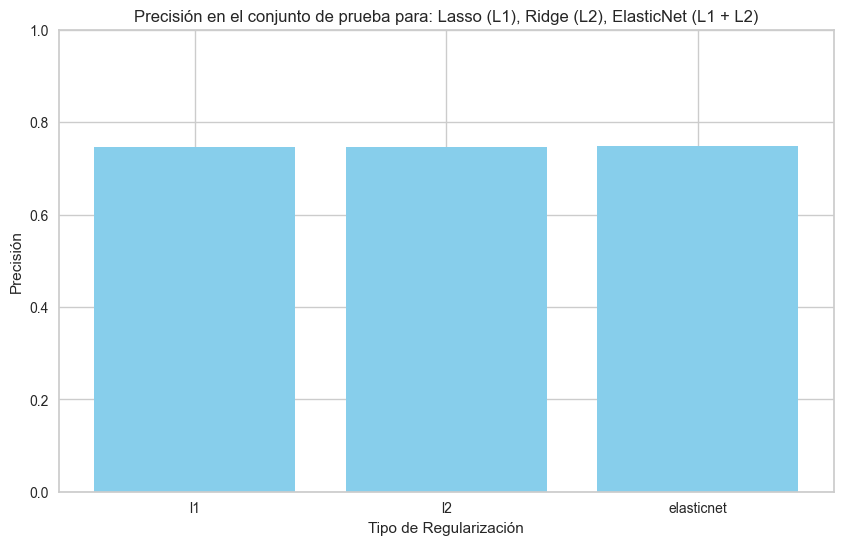

In [18]:
# Definimos los tipos de regularización a probar
penalizaciones = ['l1', 'l2', 'elasticnet']

# Vamos a usar LogisticRegressionCV para cada tipo de regularización
modelos_logreg = {}
for p in penalizaciones:
    modelos_logreg[p] = LogisticRegressionCV(penalty=p, solver='saga', cv=5, max_iter=1000, l1_ratios=[0.1, 0.5, 0.9])  

for p, modelo in modelos_logreg.items():
    modelo.fit(X_train, y_train)

precisiones = {}
for p, modelo in modelos_logreg.items():
    if p == 'elasticnet':
        l1_ratio_optimo = modelo.l1_ratio_
        print(f"El l1_ratio óptimo para ElasticNet es: {l1_ratio_optimo}")
        precision = modelo.score(X_test, y_test)
        precisiones[p] = precision
        print(f"Precisión en el conjunto de prueba (con regularización {p}): {precision}")
    else:
        precision = modelo.score(X_test, y_test)
        precisiones[p] = precision
        print(f"Precisión en el conjunto de prueba (con regularización {p}): {precision}")

# Histograma de la precisión para cada regularización
plt.figure(figsize=(10, 6))
plt.bar(precisiones.keys(), precisiones.values(), color='skyblue')
plt.title('Precisión en el conjunto de prueba para: Lasso (L1), Ridge (L2), ElasticNet (L1 + L2)')
plt.xlabel('Tipo de Regularización')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.show()

In [19]:

# We will perform regularization for different values of the regularization parameter
# TODO: Create an array (C_values) that contains 11 values distributed in log-scale, covering from 10^(-5) to 10^5

C_values = [10**i for i in range(-5,6)] # Vector of C (regularization parameters)

# Keep these two empty lists to contain the final weights for each regularization parameter
weights_evolution = []    # To store the final weights for each C
accuracies_test = []           # To store accuracy for each C

# Iterate over each value of C
for C in C_values:
    # Create and fit the logistic regression model with the current value of C
    model = LogisticRegression(penalty='elasticnet', C=1/C, solver='saga', l1_ratio=0.1)  # Update parameters as needed
    model.fit(X_train, y_train)
    
    # Store the coefficients of the model as a list
    weights_evolution.append(list(model.coef_[0]))  # Convert the weights matrix to a list and append
    
    # Predict and calculate accuracy on the test data
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracies_test.append(accuracy_test)

The optimum value of C based on accuracy is: 1
Con una precisión de 0.7482305358948432


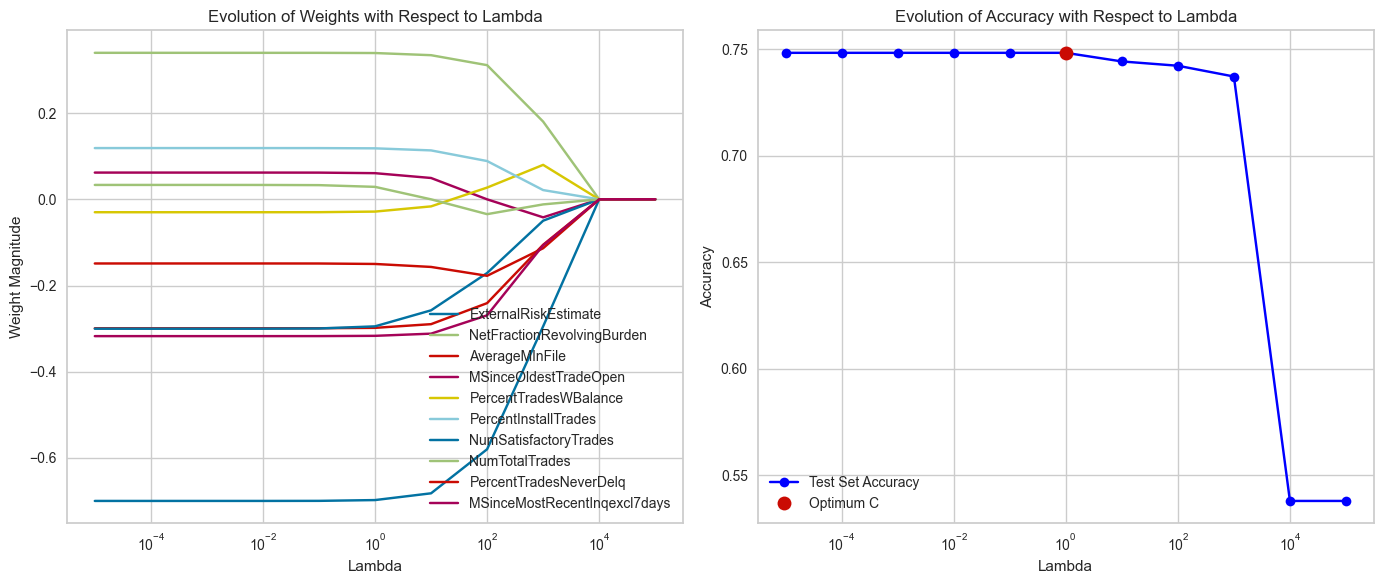

In [20]:
# Plotting the evolution of weights
plt.figure(figsize=(14, 6))

feature_names = [X.columns[i] for i in range(len(X.columns))]
# Plot for the changes in the weights in terms of the regularization parameter
plt.subplot(1, 2, 1)
for feature_index, feature_name in enumerate(feature_names):
    weight_trajectory = [weights[feature_index] for weights in weights_evolution]
    plt.plot(C_values, weight_trajectory, label=feature_name)
    
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Weight Magnitude')
plt.title('Evolution of Weights with Respect to Lambda')
plt.legend(loc='best')
plt.grid(True)

max_accuracy = max(accuracies_test)
max_accuracy_index = np.argmax(accuracies_test)
optimum_C_values = [C_values[i] for i, acc in enumerate(accuracies_test) if acc == max_accuracy]

# Select the maximum C from those that yield the highest accuracy
optimum_C = max(optimum_C_values)

print(f"The optimum value of C based on accuracy is: {optimum_C}")
print(f"Con una precisión de {max_accuracy}")

# Plotting accuracy as a function of C

plt.subplot(1, 2, 2)
plt.plot(C_values, accuracies_test, marker='o', linestyle='-', color='blue', label='Test Set Accuracy')
plt.plot(optimum_C, max_accuracy, 'ro', markersize=10, label='Optimum C')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Evolution of Accuracy with Respect to Lambda')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

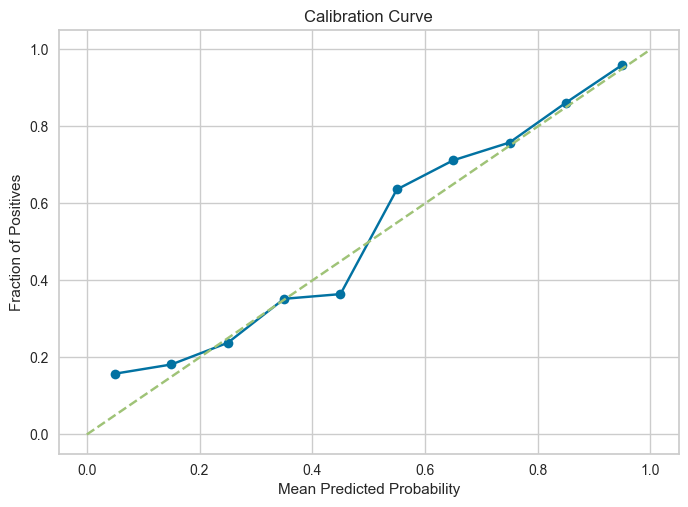

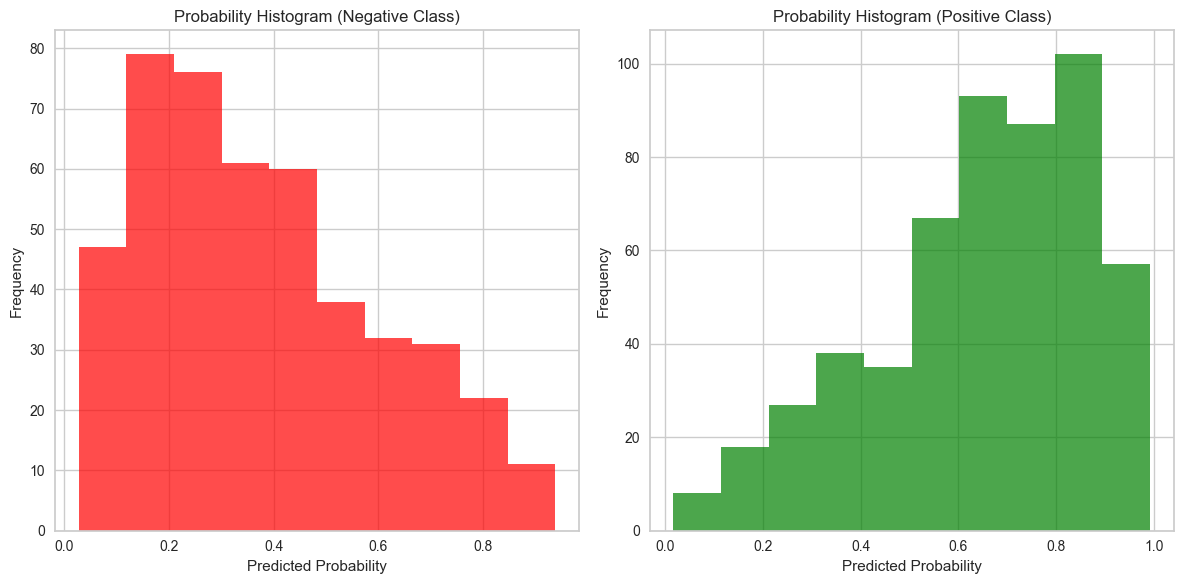

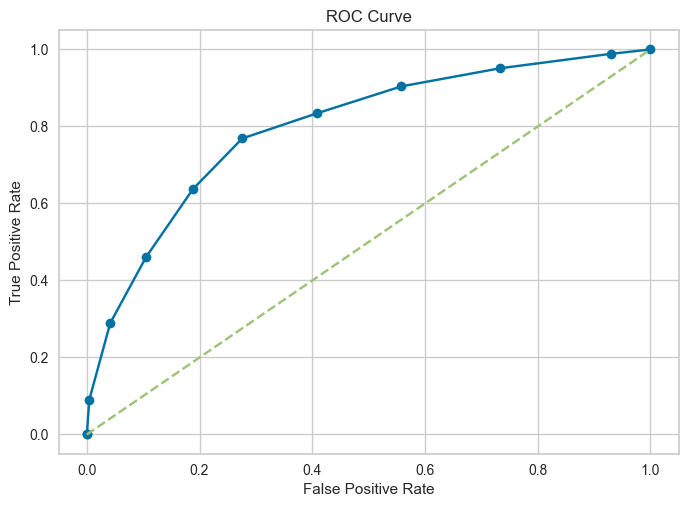

{'Confusion Matrix': [331, 126, 123, 409],
 'Accuracy': 0.7482305358948432,
 'Precision': 0.7644859813084112,
 'Recall': 0.768796992481203,
 'Specificity': 0.7242888402625821,
 'F1 Score': 0.7666354264292409}

In [21]:

logstic_regression_final = LogisticRegression(penalty='l2', C=1/optimum_C, solver='saga')
diccionario_modelos['Regresión Logística'] = logstic_regression_final
logstic_regression_final.fit(X_train, y_train)

y_test_pred = logstic_regression_final.predict(X_test)
y_test_prob = logstic_regression_final.predict_proba(X_test)[:,1]
y_train_prob = logstic_regression_final.predict_proba(X_train)[:,1]
classification_report(y_test, y_test_prob, 1 , threshold = 0.5)

## Naive Bayes

### A diferencia de los modelos anteriores, en este no hará falta normalizar las variables de entrada ya que Naive Bayes asume independencia condicional entre las características, las distribuciones de probabilidad condicional se calculan de forma independiente para cada característica, y la escala de la escala de estas no afecta a las distribuciones de manera significativa.

### Tampoco hará falta hacer validación cruzada ya que no hay un hiperparámetro que queramos optimiza.

In [22]:
modelo_NB= GaussianNB()
diccionario_modelos['Naive Bayes'] = modelo_NB

modelo_NB.fit(X_train, y_train)
y_pred = modelo_NB.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo Naive Bayes:", precision)

Precisión del modelo Naive Bayes: 0.7290192113245703


# Bagging

## He decidido usar este modelo unicamente para mostrar la grafica de Importancia de Variables.

<Axes: >

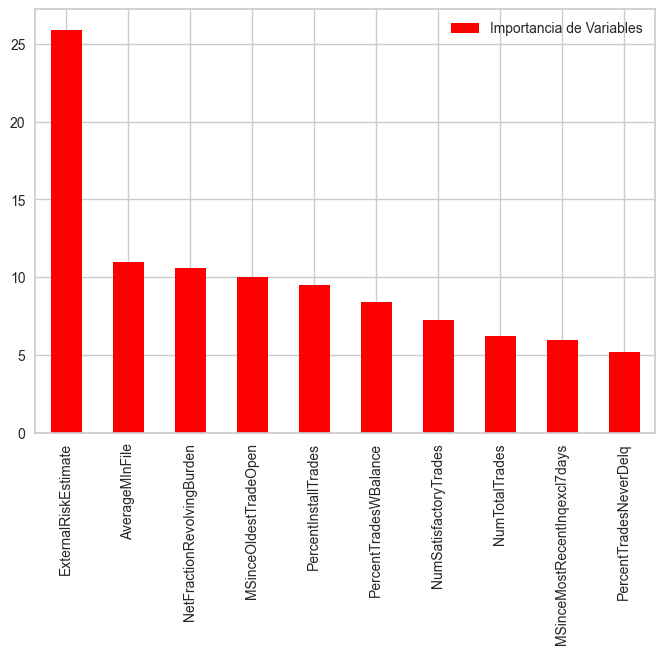

In [23]:
n_estimators = 10
max_samples = 0.8
predictions = []

for i in range(n_estimators):
    sample_indices = np.random.choice(X_train.index, size=int(len(X_train) * max_samples), replace=True)

    X_bootstrap = X_train.loc[sample_indices]
    y_bootstrap = y_train.loc[sample_indices]
    
    decision_tree = BaggingClassifier()
    decision_tree.fit(X_bootstrap, y_bootstrap)

    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

predictions = np.array(predictions)
majority_vote, _ = mode(predictions, axis=0)

feature_importances = np.mean([tree.feature_importances_ for tree in decision_tree.estimators_], axis=0)

# bagging_featureImportance = pd.DataFrame({'Feature Importance':bagging.feature_importances_*100},index = X.columns)
bagging_featureImportance = pd.DataFrame({'Importancia de Variables':feature_importances*100},index = X.columns)
bagging_featureImportance.sort_values('Importancia de Variables', ascending=False).plot(kind='bar', color='red')

## Random Forest

### Por ser un modelo derivado de un árbol, tampoco requiere de la normalizacion de las columnas del dataset (El haber nromalizado no afecta al performance del modelo). En este modelo contamos ahora con dos hiperparámetros principales a tener en cuenta, el primero siendo la altura del árbol, y el segundo siendo el numero de estimadores/clasificadores(árboles construidos de distinta forma) a partir de los cuales se toma la decisión final, en base a la clase más votada. 

In [24]:
modelo_random_forest = RandomForestClassifier(random_state=42)
modelo_random_forest.fit(X_train, y_train)

y_pred_inicial_rf = modelo_random_forest.predict(X_test)

precision_inicial_random_forest = accuracy_score(y_test, y_pred_inicial_rf)
print("Precisión del modelo de Random Forest:", precision_inicial_random_forest)


param_grid = {
    'max_depth': [5, 10, 15],  # Rango de posibles valores para la profundidad del árbol
    'n_estimators': [50, 100, 150]  # Rango de posibles valores para el número de estimadores
}

modelo_random_forest = RandomForestClassifier()

grid_search = GridSearchCV(estimator=modelo_random_forest, param_grid=param_grid, cv=5, scoring='accuracy') #Lo que hace esta clase con param_grid, es hacer validación cruzada con todas las posibles combinaciones de hiperparámetros especificados
grid_search.fit(X_train, y_train)

mejores_parametros = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", mejores_parametros)   


Precisión del modelo de Random Forest: 0.7209302325581395
Mejores hiperparámetros encontrados: {'max_depth': 5, 'n_estimators': 50}


### COMENTARIO IMPORTANTE: Es normal que los hiperparámetros óptimos varien (cada vez que se ejecutan), pero tras varias pruebas los óptimos son: max_depth = 5 y n_estimators = 150. NOTA: Se podría haber cojido la media de diferentes ejecuciones. 

In [25]:
modelo_random_forest_optimo = RandomForestClassifier(max_depth=5, n_estimators=150)
diccionario_modelos['Random Forest'] = modelo_random_forest_optimo
modelo_random_forest_optimo.fit(X_train, y_train)

y_pred_final = modelo_random_forest_optimo.predict(X_test)
precision_final_random_forest = accuracy_score(y_test, y_pred_final)
print("Precisión final del modelo:", precision_final_random_forest)

Precisión final del modelo: 0.7441860465116279


# Support Vector Machine

## COMENTARIO:  SVM es un modelo capaz de trabaja muy bien con variables que en altas dimensiones, pero he decidido ver la precisión para dos kernels unicamente: el lineal y el radial (rbf).

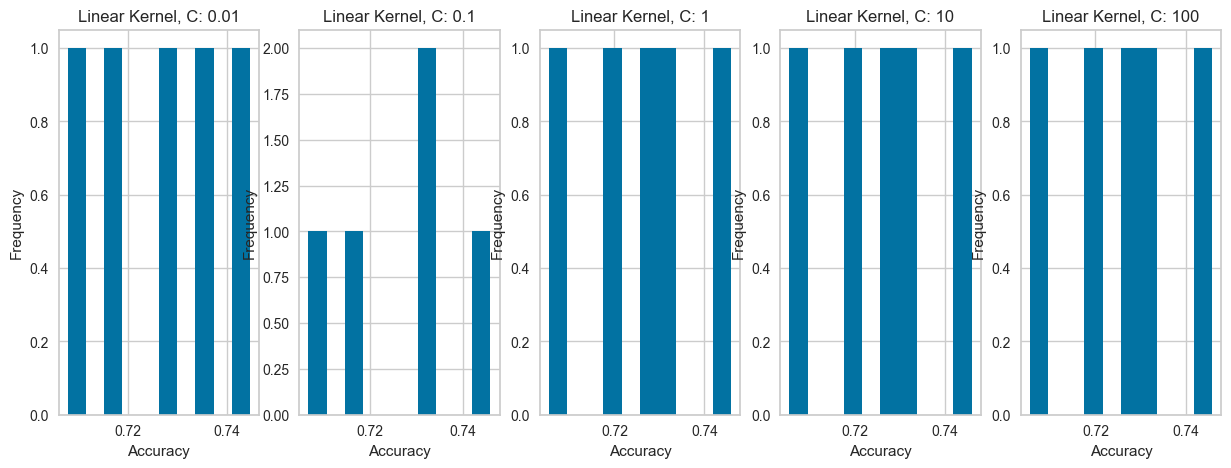

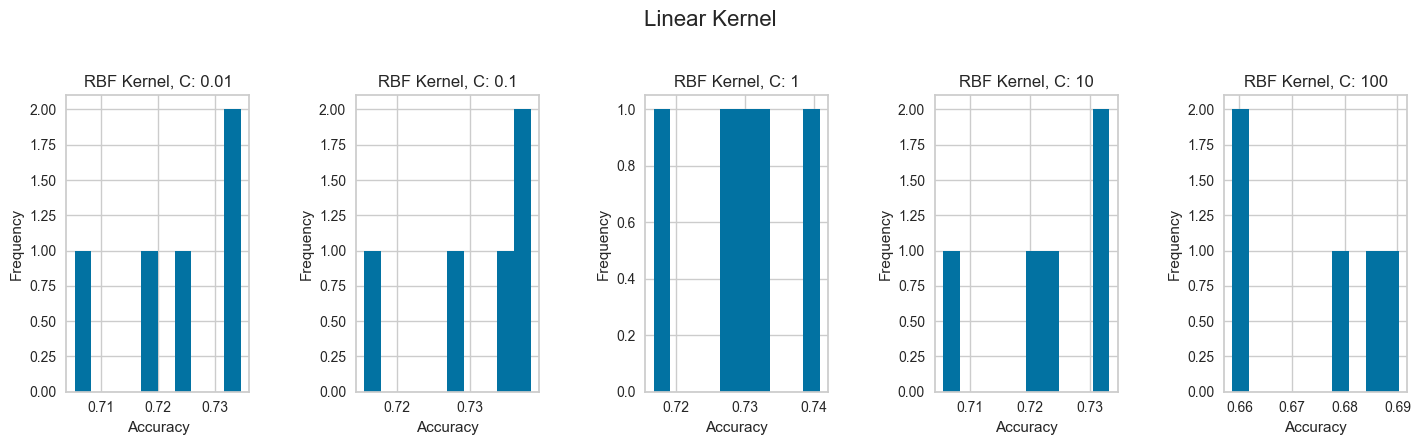

<Figure size 800x550 with 0 Axes>

In [26]:
# Definir los valores de C a probar
C_values = [0.01, 0.1, 1, 10, 100]

# Crear subgráficos para el kernel lineal
fig, axes_linear = plt.subplots(1, len(C_values), figsize=(15, 5))

# Crear subgráficos para el kernel RBF
fig, axes_rbf = plt.subplots(1, len(C_values), figsize=(15, 5))

# Iterar sobre cada valor de C
for j, C in enumerate(C_values):
    # Inicializar el clasificador SVM con el kernel lineal y el valor de C específico
    svm_linear = SVC(kernel='linear', C=C)
    
    # Calcular la precisión del clasificador SVM lineal utilizando validación cruzada
    accuracies_linear = cross_val_score(svm_linear, X_train, y_train, cv=5)
    
    # Dibujar el histograma de las precisiones para el kernel lineal
    axes_linear[j].hist(accuracies_linear, bins=10)
    axes_linear[j].set_title(f"Linear Kernel, C: {C}")
    axes_linear[j].set_xlabel("Accuracy")
    axes_linear[j].set_ylabel("Frequency")

    # Inicializar el clasificador SVM con el kernel RBF y el valor de C específico
    svm_rbf = SVC(kernel='rbf', C=C)
    
    # Calcular la precisión del clasificador SVM RBF utilizando validación cruzada
    accuracies_rbf = cross_val_score(svm_rbf, X_train, y_train, cv=5)
    
    # Dibujar el histograma de las precisiones para el kernel RBF
    axes_rbf[j].hist(accuracies_rbf, bins=10)
    axes_rbf[j].set_title(f"RBF Kernel, C: {C}")
    axes_rbf[j].set_xlabel("Accuracy")
    axes_rbf[j].set_ylabel("Frequency")

# Ajustar el diseño de los subgráficos para el kernel lineal
plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=3.0)
plt.suptitle('Linear Kernel', fontsize=16)

# Mostrar el gráfico para el kernel lineal
plt.show()

# Ajustar el diseño de los subgráficos para el kernel RBF
plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=3.0)
plt.suptitle('RBF Kernel', fontsize=16)

# Mostrar el gráfico para el kernel RBF
plt.show()


In [27]:
svm_classifier_lineal_final = SVC(kernel='linear', C=1)
diccionario_modelos['SVM (Kernel Lineal)'] = svm_classifier_lineal_final

svm_classifier_rbf_final = SVC(kernel='rbf', C=0.1)
diccionario_modelos['SVM (Kernel RBF)'] = svm_classifier_rbf_final

# Visual and Comparative Analysis

In [28]:
print(diccionario_modelos)

{'Regresión Logística': LogisticRegression(solver='saga'), 'Naive Bayes': GaussianNB(), 'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=150), 'SVM (Kernel Lineal)': SVC(C=1, kernel='linear'), 'SVM (Kernel RBF)': SVC(C=0.1)}


In [29]:
# Métricas a calcular
metricas = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

# DataFrame para almacenar las métricas
resultados_df = pd.DataFrame(columns=metricas.keys())

# Iterar sobre cada modelo
for nombre_modelo, modelo in diccionario_modelos.items():
    # Ajustar el modelo
    modelo.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular las métricas para el modelo
    metricas_modelo = {}
    for nombre_metrica, funcion_metrica in metricas.items():
        metricas_modelo[nombre_metrica] = funcion_metrica(y_test, y_pred)
    
    # Almacenar las métricas calculadas en el DataFrame
    resultados_df.loc[nombre_modelo] = metricas_modelo

# Mostrar el DataFrame con las métricas
print(resultados_df)


                     Accuracy  Precision    Recall  F1 Score
Regresión Logística  0.748231   0.764486  0.768797  0.766635
Naive Bayes          0.729019   0.761905  0.721805  0.741313
Random Forest        0.744186   0.751351  0.783835  0.767249
SVM (Kernel Lineal)  0.749242   0.765918  0.768797  0.767355
SVM (Kernel RBF)     0.746208   0.758748  0.774436  0.766512


SVM (Kernel Lineal)
SVM (Kernel RBF)


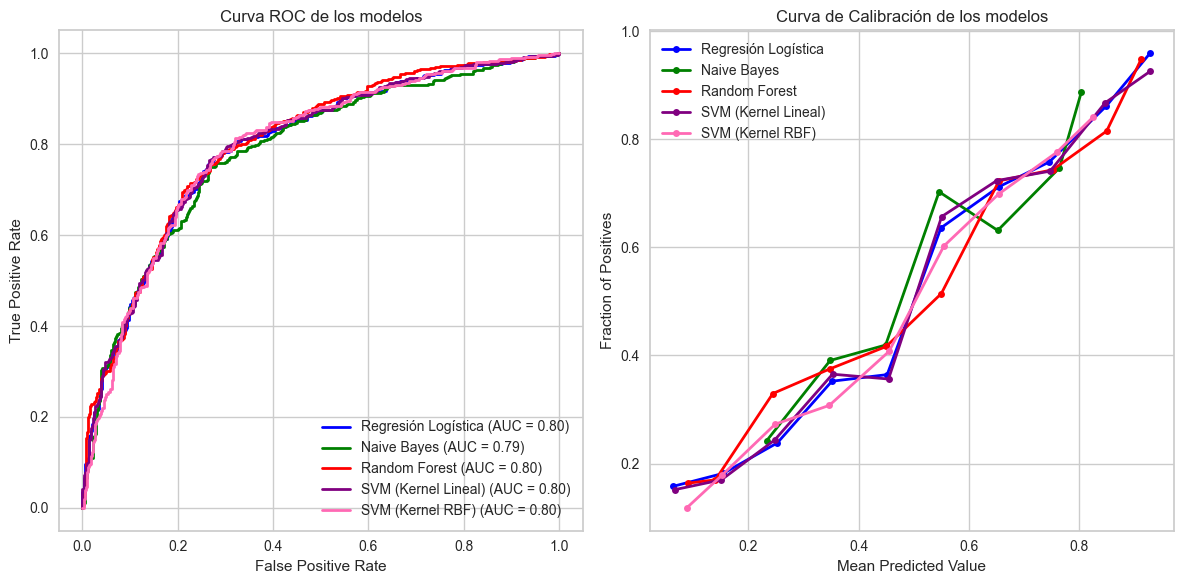

In [30]:
# Colores para las curvas ROC
colores = ['blue', 'green', 'red', 'purple','hotpink']

# Crear subgráficos para las curvas ROC y de calibración
fig, (ax_roc, ax_cal) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


# Iterar sobre cada modelo
for i, (nombre_modelo, modelo) in enumerate(diccionario_modelos.items()):
    # Ajustar el modelo
    modelo.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    if hasattr(modelo, "predict_proba"):  # Comprobar si el modelo tiene el método predict_proba
        y_prob = modelo.predict_proba(X_test)[:, 1]
    else:  # Si no tiene predict_proba, usar decision_function
        print(nombre_modelo)
        y_prob = modelo.decision_function(X_test)
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plotear la curva ROC
    ax_roc.plot(fpr, tpr, color=colores[i], lw=2, label=f'{nombre_modelo} (AUC = {roc_auc:.2f})')
    
    # Calibrar el modelo para obtener probabilidades calibradas
    calibrated_model = CalibratedClassifierCV(modelo, method='sigmoid', cv='prefit')
    calibrated_model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_prob = calibrated_model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva de calibración
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)
    
    # Plotear la curva de calibración
    ax_cal.plot(mean_predicted_value, fraction_of_positives, marker='o', markersize=5, color=colores[i], lw=2, label=f'{nombre_modelo}')


# Añadir leyendas y etiquetas
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Curva ROC de los modelos')
ax_roc.legend()

ax_cal.set_xlabel('Mean Predicted Value')
ax_cal.set_ylabel('Fraction of Positives')
ax_cal.set_title('Curva de Calibración de los modelos')
ax_cal.legend()

# Ajustar diseño
plt.tight_layout()
plt.show()


# Part 3: Unsupervised Learning

## PCA

## Voy a proceder a hacer analizar la posible reducción de dimensionalidad, y trabajar con el dataset a falta de las variables de salida.

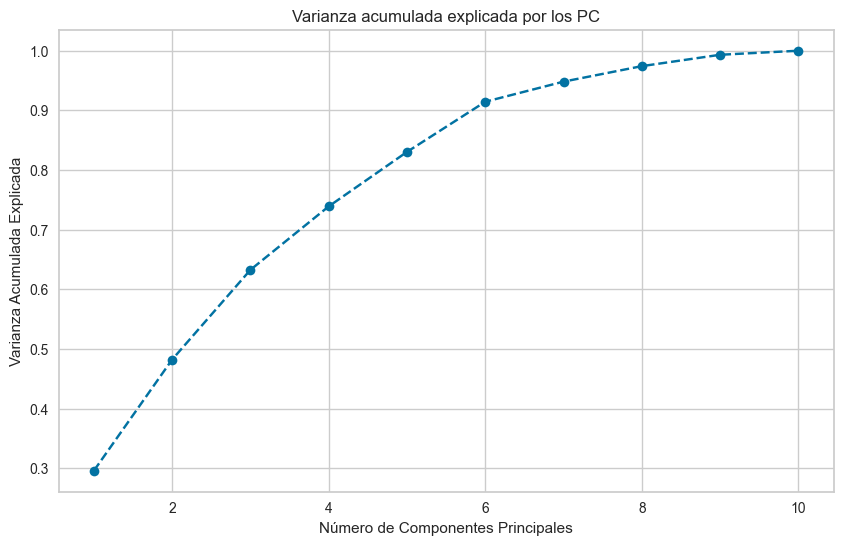

In [31]:
# Estandarizar los datos
scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(X)

# Aplicar el PCA a los datos estandarizados
pca = PCA()
pca.fit(X_estandarizado)

# Calcular la varianza explicada por cada componente principal
var_exp = pca.explained_variance_ratio_

# Calcular la varianza acumulada explicada
cum_var_exp = np.cumsum(var_exp)

# Trazar la varianza acumulada explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, marker='o', linestyle='--')
plt.title('Varianza acumulada explicada por los PC')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()

In [32]:
# Obtener los loadings de cada componente principal
loadings = pca.components_

# Crear un DataFrame para los loadings
loadings_df = pd.DataFrame(loadings, columns=X.columns, index=[f'PC{i+1}' for i in range(len(loadings))])

print("Loadings de cada componente principal:")
loadings_df

Loadings de cada componente principal:


ExternalRiskEstimate  NetFractionRevolvingBurden  AverageMInFile  \
PC1              -0.409455                    0.388876       -0.322470   
PC2              -0.344140                    0.269992       -0.046979   
PC3              -0.179965                    0.196810        0.597246   
PC4              -0.259459                   -0.112534       -0.114434   
PC5              -0.187204                    0.258430       -0.116557   
PC6              -0.117694                   -0.424170       -0.104245   
PC7              -0.182704                    0.486048       -0.046080   
PC8               0.314952                    0.321094        0.552923   
PC9               0.657144                    0.372065       -0.434304   
PC10              0.029944                   -0.000243       -0.055574   

      MSinceOldestTradeOpen  PercentTradesWBalance  PercentInstallTrades  \
PC1               -0.345291               0.402373              0.224646   
PC2                0.088375               0.160322              0.115624   
PC3                0.550084               0.159800             -0.051697   
PC4               -0.109299              -0.427808             -0.571398   
PC5               -0.135437              -0.038520             -0.533763   
PC6               -0.129413              -0.271125              0.458522   
PC7                0.186783              -0.716347              0.328392   
PC8               -0.654202              -0.122694              0.047950   
PC9                0.239875               0.008548             -0.041075   
PC10               0.054093               0.023760              0.004907   

      NumSatisfactoryTrades  NumTotalTrades  PercentTradesNeverDelq  \
PC1               -0.289902       -0.269895               -0.257738   
PC2                0.601288        0.618380               -0.006083   
PC3               -0.145388       -0.103727               -0.454746   
PC4                0.005177        0.021059               -0.376544   
PC5                0.035789        0.021909               -0.013678   
PC6                0.064625        0.120457               -0.584146   
PC7               -0.088022       -0.127577                0.218775   
PC8                0.125066        0.060882               -0.158570   
PC9                0.001479        0.130369               -0.405000   
PC10               0.710209       -0.693968               -0.080678   

      MSinceMostRecentInqexcl7days  
PC1                      -0.149079  
PC2                      -0.124920  
PC3                       0.051803  
PC4                      -0.493157  
PC5                       0.760201  
PC6                       0.367355  
PC7                       0.022023  
PC8                      -0.046418  
PC9                      -0.028032  
PC10                     -0.001665

In [33]:
pca5 = PCA(n_components=5)
pca5.fit(X_estandarizado)

X_pca5 = pca5.transform(X_estandarizado)
X_train_pca5, X_test_pca5, y_train5, y_test5 = train_test_split(X_pca5, y, test_size=0.2, random_state=42)

for nombre_modelo, modelo_pca in diccionario_modelos.items():
    modelo_pca.fit(X_train_pca5, y_train5)
    y_pred = modelo_pca.predict(X_test_pca5)
    accuracy = accuracy_score(y_test5, y_pred)
    print(f'Precisión de {nombre_modelo} con PCA: {accuracy}')

Precisión de Regresión Logística con PCA: 0.7421638018200202
Precisión de Naive Bayes con PCA: 0.7350859453993933
Precisión de Random Forest con PCA: 0.7360970677451971
Precisión de SVM (Kernel Lineal) con PCA: 0.7431749241658241
Precisión de SVM (Kernel RBF) con PCA: 0.7462082912032356


### Visualización para dos dimensiones 

In [34]:
pca2 = PCA(n_components=2)
pca2.fit(X_estandarizado)
X_pca = pca2.transform(X_estandarizado)

<Axes: xlabel='PC1', ylabel='PC2'>

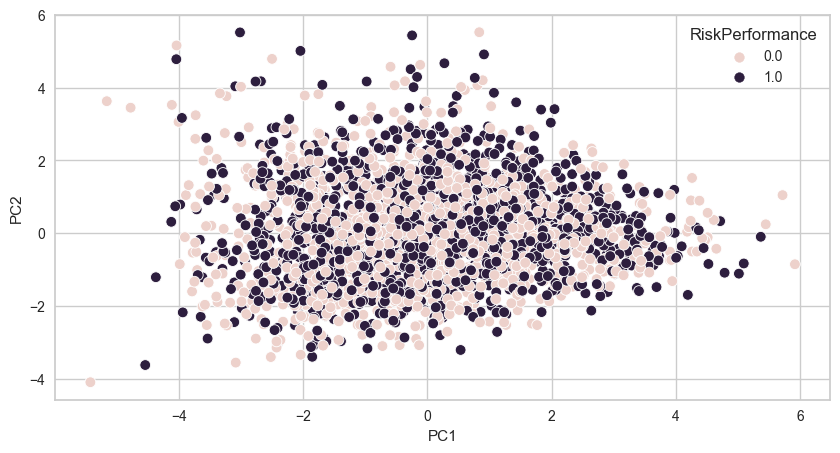

In [35]:
principal_df = pd.DataFrame(X_pca , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(y)] , axis = 1)
plt.figure(figsize=(10,5))
sns.scatterplot(data = principal_df , x = 'PC1', y = 'PC2', hue = 'RiskPerformance' , s = 60)

## Clustering

## Comenzando con el algoritmo KMeans, he decidido representar visualmente el método del codo para obtener el número de clusters óptimo.

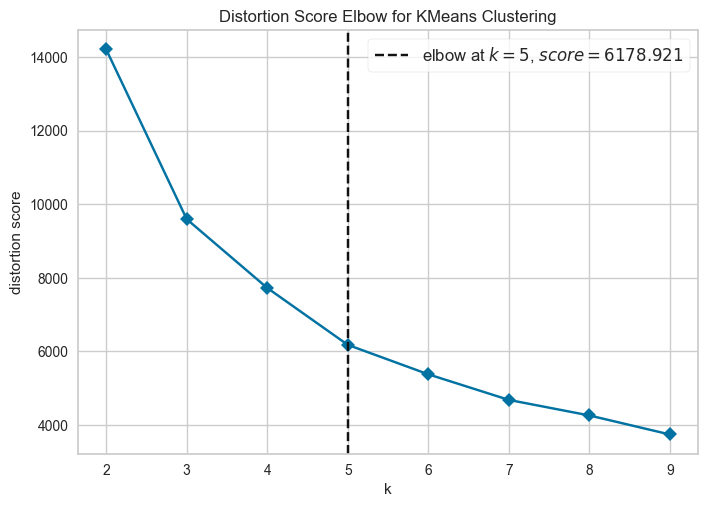

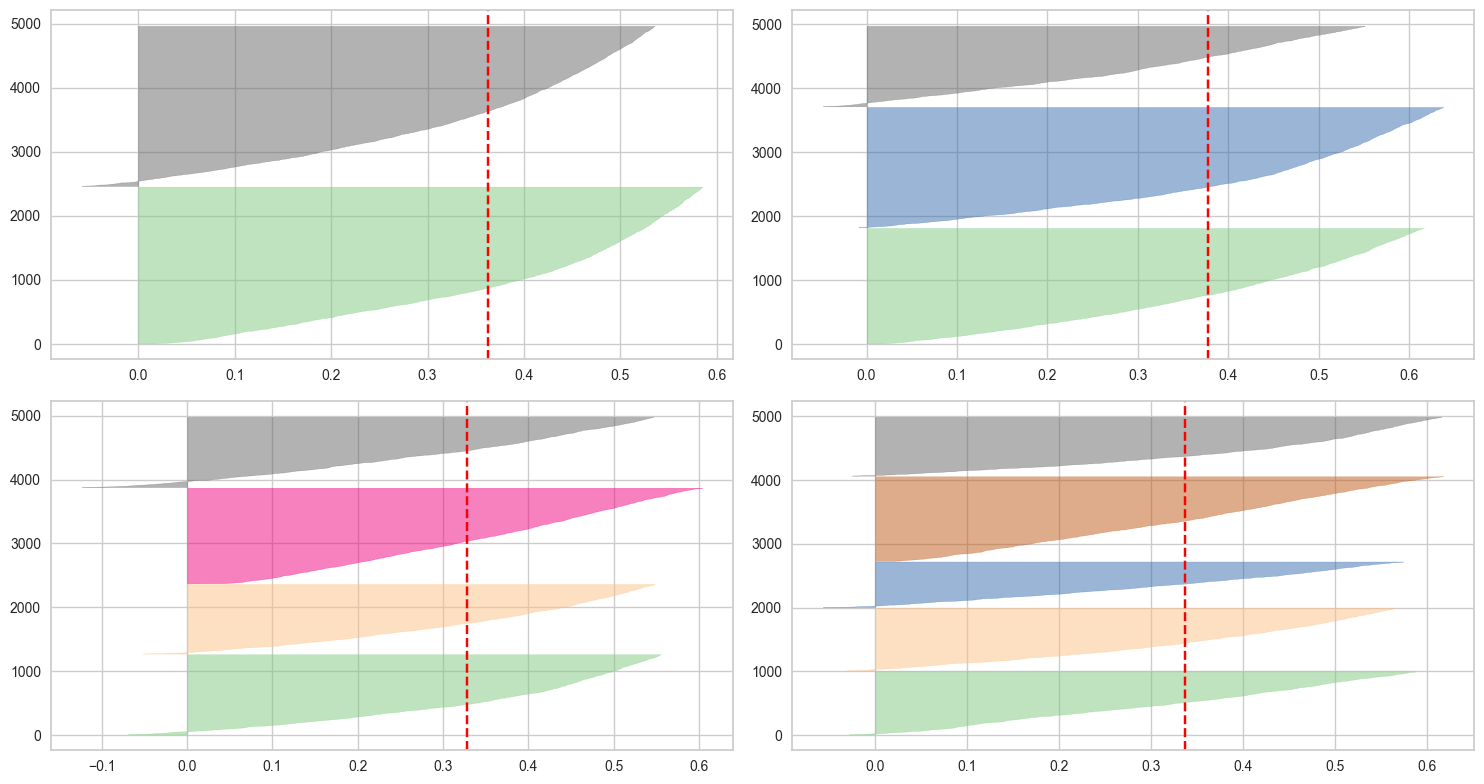

In [36]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_estandarizado)


km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10),timings=False)
visualizer.fit(X_pca)  
visualizer.show()

fig, ax = plt.subplots(2, 2, figsize=(15,8))  
cluster_counts = [2, 3, 4, 5]

for i, k in enumerate(cluster_counts):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='Accent', ax=ax[i//2, i%2])
    visualizer.fit(X_pca)  # Fit the visualizer to the PCA-reduced data

plt.tight_layout()
plt.show()

In [37]:
import sklearn
import yellowbrick
import numpy

print(sklearn.__version__)
print(yellowbrick.__version__)
print(numpy.__version__)

1.4.2
1.5
1.26.4


In [38]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

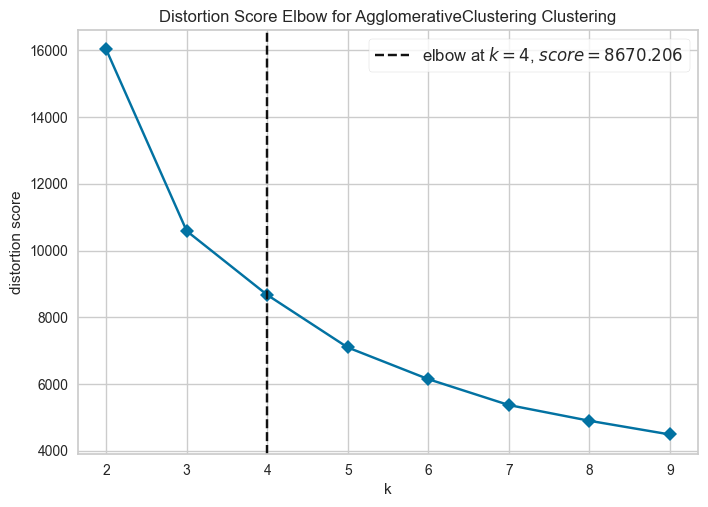

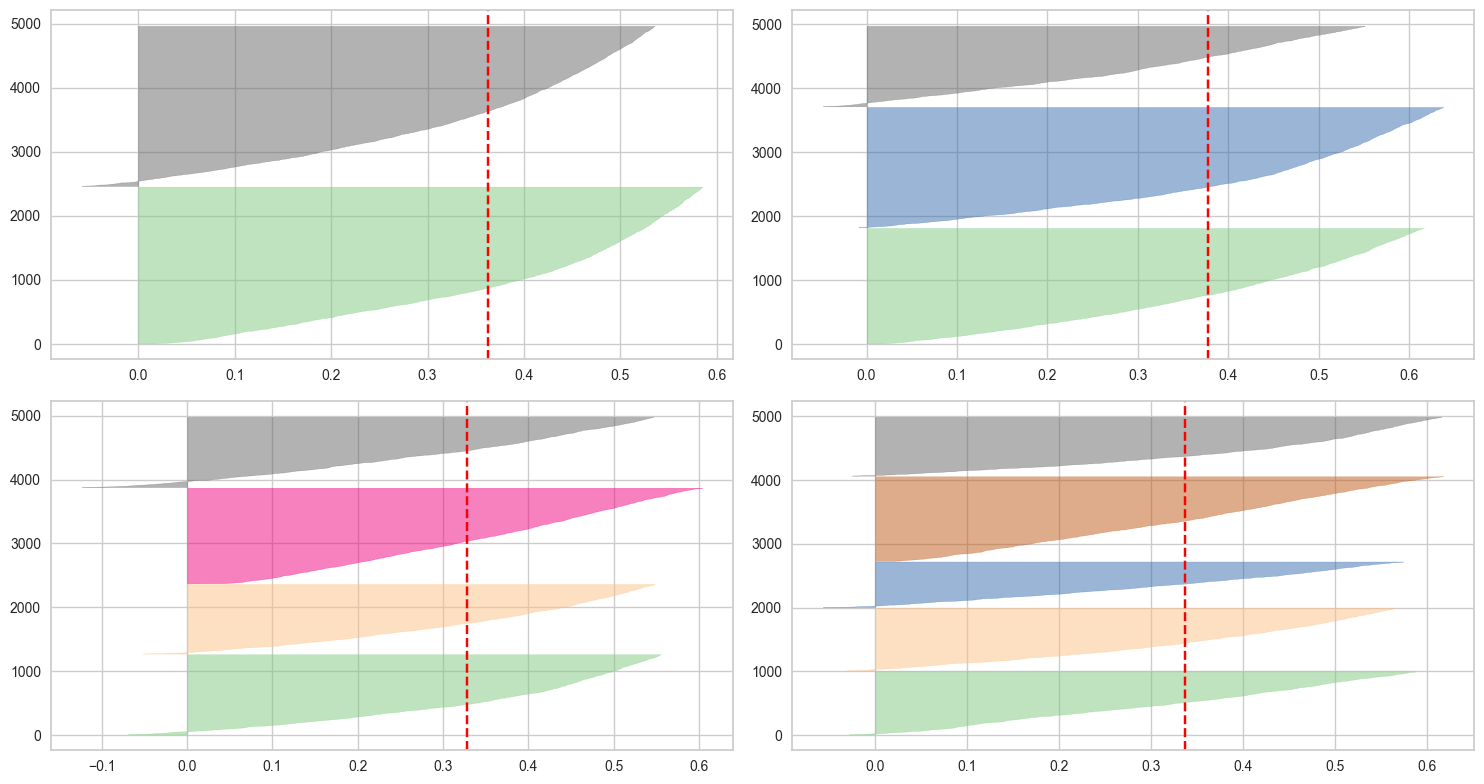

In [39]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_estandarizado)

km = AgglomerativeClustering()
visualizer = KElbowVisualizer(km, k=(2,10),timings=False)
visualizer.fit(X_pca)  
visualizer.show()

fig, ax = plt.subplots(2, 2, figsize=(15,8))  
cluster_counts = [2, 3, 4, 5]

for i, k in enumerate(cluster_counts):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='Accent', ax=ax[i//2, i%2])
    visualizer.fit(X_pca)  # Fit the visualizer to the PCA-reduced data

plt.tight_layout()
plt.show()

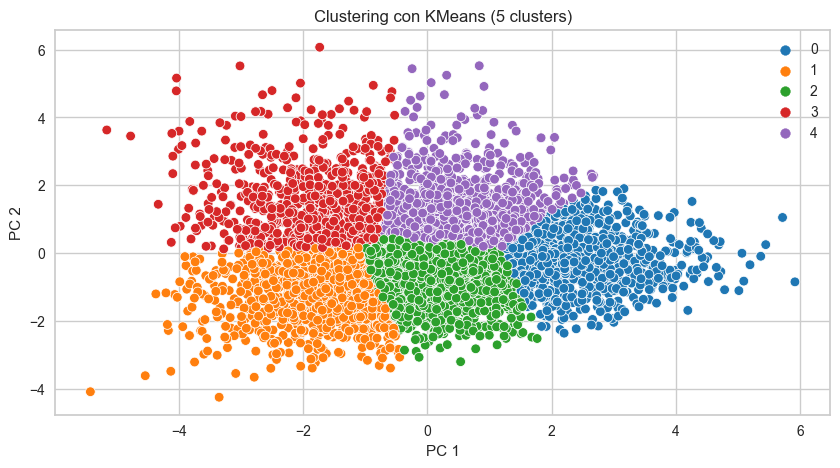

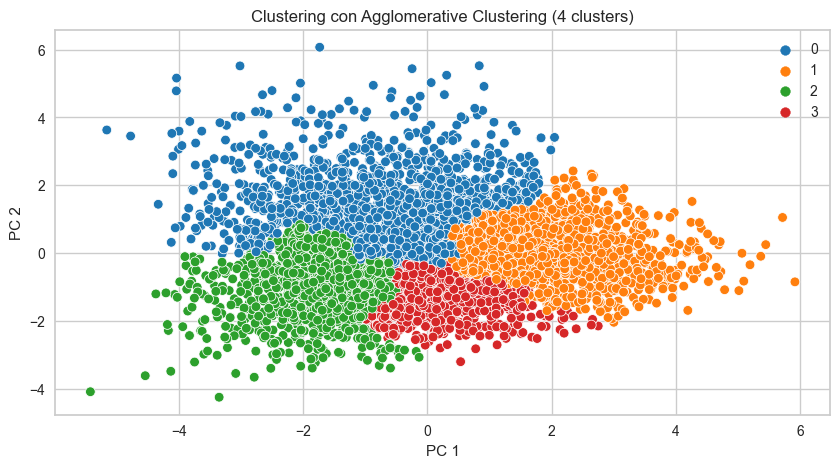

In [40]:
# Ajustar KMeans con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

# Ajustar Agglomerative Clustering con 4 clusters
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X_pca)

# Visualizar los resultados de KMeans
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='tab10', legend='full')
plt.title('Clustering con KMeans (5 clusters)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Visualizar los resultados de Agglomerative Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_clustering.labels_, palette='tab10', legend='full')
plt.title('Clustering con Agglomerative Clustering (4 clusters)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Conclusiones

In [41]:
n_splits = 5
precisiones_modelos = {}
varianza_modelos = {}

kf = KFold(n_splits=n_splits)

for nombre_modelo, modelo in diccionario_modelos.items():
    precisiones = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        modelo.fit(X_train, y_train)
        precision = modelo.score(X_test, y_test)
        precisiones.append(precision)
    
    varianza = np.var(precisiones)
    precisiones_modelos[nombre_modelo] = precisiones
    varianza_modelos[nombre_modelo] = varianza

print(precisiones_modelos)
print(varianza_modelos)

/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mike/Documents/IMAT Segundo/Machine Learning/ML_Final_Project_Miguel_Angel_Huamani/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

{'Regresión Logística': [0.6835187057633973, 0.7077856420626896, 0.6946410515672397, 0.6814964610717897, 0.6993927125506073], 'Naive Bayes': [0.7037411526794742, 0.731041456016178, 0.7168857431749242, 0.7037411526794742, 0.7510121457489879], 'Random Forest': [0.7189079878665319, 0.7330637007077856, 0.7249747219413549, 0.7017189079878665, 0.7479757085020243], 'SVM (Kernel Lineal)': [0.7189079878665319, 0.750252780586451, 0.7330637007077856, 0.7037411526794742, 0.7611336032388664], 'SVM (Kernel RBF)': [0.6936299292214358, 0.7259858442871587, 0.698685540950455, 0.6936299292214358, 0.7196356275303644]}
{'Regresión Logística': 9.674565037017725e-05, 'Naive Bayes': 0.00032276364887157995, 'Random Forest': 0.00023429807048802693, 'SVM (Kernel Lineal)': 0.0004285891460510884, 'SVM (Kernel RBF)': 0.00018888238125199045}


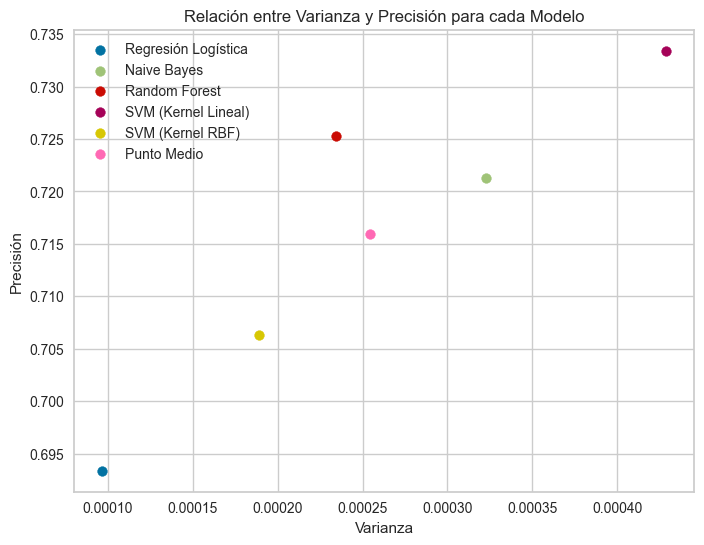

In [42]:
# Obtener los nombres de los modelos y sus precisiones y varianzas
modelos = list(varianza_modelos.keys())
precisiones = np.array([np.mean(precisiones_modelos[m]) for m in modelos])
varianzas = np.array([varianza_modelos[m] for m in modelos])

# Trazar un gráfico de dispersión
plt.figure(figsize=(8, 6))
for modelo, precision, varianza in zip(modelos, precisiones, varianzas):
    plt.scatter(varianza, precision, label=modelo)

plt.xlabel('Varianza')
plt.ylabel('Precisión')
plt.title('Relación entre Varianza y Precisión para cada Modelo')

# Calcular el punto medio
punto_medio = np.mean(varianzas), np.mean(precisiones)

# Trazar el punto medio
plt.scatter(*punto_medio, color='hotpink', label='Punto Medio')

plt.legend()
plt.grid(True)
plt.show()